# Resume Optimization

## Overview

The goal of the project is to tailor a resume to the data science field to improve it's rating in a compnaies applicant tracking system to increase the odds of scoring an interview. This was done by scraping resumes from Indeed and recent job posts for data scientists/analysts positions from Indeed and Glassdoor. NLP preprocessing was applied to the resumes as well as my own. Modeling was done through TF-IDF and Latent Dirichlet Allocation. From there I measured the cosine similarity using TF-IDF between my resume and the target fields, the first being the resumes of other data scientist and then against the scraped job posts. By identifying key words and skills and then incorporating them into my resume, the cosine smilarity score increases which in turn should increase my ranking within a companies tracking system.


## Business Understanding

Most companies, especially the big ones, don’t read every resume that they receive. They usually rely on an Applicant Tracking system that will rank applicants for a specific job opening and usually focus on the ones most fitting for the job. As someone who has just completed a data science bootcamp and is undergoing a pretty big career change, It is my hope that I can use what I learned to make my self more hirable by tailoring my resume towards this new field.

## Methods

1. Scrape Indeed for Resumes using sellenium. To do this I had purchased Indeeds "For Employers' subsription for one month in order to have access to candidate resumes
2. Use sellenium and beautiful soup to scrape the most recent entry level and junior data scientist/analyst job posts from Glassdoor and Inded.
3. Preprocess and clean data by removing stop words,apply stemming etc. This goes for the resumes, job posts and resume being optimized
4. TF-IDF and LDA modeling
5. Determine Cosine Similarity between my resume and the ones scraped from indeed.
6. Modify my resume by adding or modifying key words synonymous with the other resumes
7. Determine Cosine Similarity between my resume and the job posts.
8. Once again modify my resume to increase the similarity score when scored against the job post data

## Data Understanding

The data for the project was scraped using mostly selenium, beautiful soup, and APIs.

In total I was able to scrape over 8000 Data Scientist Resumes from Indeed, however only about 4,000 were usable. There were many that were just the skeleton of a resume, and others were resumes of people that are in a completely unrelated field. These resumes were pulled in the form of pdfs. 

Approximately 600 recent job posts for entry and junior level data scientist were also sccraped from Glassdoor. These were pulled into a single csv file.

NLP Preprocessing was conducted to extract key words or phrases and their significance throughout all the files to the best of my abilities.


## Evaluation against other Resumes

Without making changes or looking at other applicants then scoring the resume against all the others resulted in a similarity score of approximately 0.7093

Upon modifying against my resume against other data scientist/analyst CV's I was able to raise my similarity score to above 0.8019.


## Evaluation against job postings and Conclusion 

The increase in similarity scores against other applicants builds a good initial resume, however my goal is not to become identical to another candidate. The purpose of this project is to try and appear as an ideal candidate for the  data scientist jobs I will be applying to. 

Therefore, we basically have to repeat the entire proces with our new modified resume and tailor it further against the 700 job posts that were scraped

Upon scoring the previous resume against these job descriptions, I had wound up with a cosine similarity of 0.7840.

Once again modfying my resume so it is more synonymous with the job I am going for, the cosine similarity score rose to a 0.8431. 

This is at least higher than what I had started with and should make me look as a more favorable applicant when put through a companies ATS system.


In [101]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.corpus import stopwords, brown
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models, similarities

import re
import string
from autocorrect import spell

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

from collections import defaultdict
from time import time
from collections import Counter, defaultdict
import PyPDF2
import textract 
import pandas as pd
import numpy as np
from textblob import TextBlob
import operator
import re
import os
import csv
import pickle

In [102]:
Resumes_df = pd.read_csv('C:\\Users\\Jakub\\Documents\\GitHub\\Resume-Optimizer\\result.csv', low_memory=False)
Jobs_df = pd.read_csv('C:\\Users\\Jakub\\Documents\\GitHub\\Resume-Optimizer\\data\\Cleaned_DS_Jobs.csv', low_memory=False)
My_Resume = pd.read_csv('C:\\Users\\Jakub\\Documents\\GitHub\\Resume-Optimizer\\data\\Jakub_Rybicki_Resume.csv', low_memory=False)

### Cleaning

In [103]:
# convert all text to lower case and separate into list
Resumes_df['Header'] = Resumes_df['Header'].astype('str')
Resumes_df['Header'] = Resumes_df['Header'].str.lower().str.split()
listStopWords = list(set(stopwords.words('english')))
# remove stopwords
Resumes_df['Header'] = Resumes_df['Header'].apply(lambda x: ' '.join([item for item in x if item not in listStopWords]))

In [104]:
Resumes_df['Header'] = Resumes_df['Header'].str.replace(r'''[^0-9a-zA-Z ]+''', '')

C:\Users\Jakub\AppData\Local\Temp/ipykernel_9892/4119998814.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Resumes_df['Header'] = Resumes_df['Header'].str.replace(r'''[^0-9a-zA-Z ]+''', '')


In [105]:
Resumes_df['Header'] = Resumes_df['Header'].str.replace(':|;', '')
Resumes_df['Header'] = Resumes_df['Header'].str.replace('.', '')
Resumes_df['Header'] = Resumes_df['Header'].str.replace(',', '')

C:\Users\Jakub\AppData\Local\Temp/ipykernel_9892/867809033.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Resumes_df['Header'] = Resumes_df['Header'].str.replace(':|;', '')
C:\Users\Jakub\AppData\Local\Temp/ipykernel_9892/867809033.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Resumes_df['Header'] = Resumes_df['Header'].str.replace('.', '')


In [106]:
Resumes_df['Header']=Resumes_df['Header'].str.replace('email', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('%@%', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('using', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('2021', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('2020', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('2019', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('january', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('february', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('march', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('april', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('may', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('june', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('july', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('august', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('september', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('october', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('november', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('december', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('jan', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('feb', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('mar', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('apr', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('may', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('jun', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('jul', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('aug', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('sept', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('oct', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('nov', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('dec', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('ca', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('at', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('work', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('business', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('experience', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('august', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('new', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('educ', '')
Resumes_df['Header']=Resumes_df['Header'].str.replace('da', 'data')



In [107]:
# cache stopwords first to reduce compute time
cachedStopWords = stopwords.words("english")

# convert all text to lower case and separate into list
Resumes_df['Header'] = Resumes_df['Header'].str.lower().str.split()

# remove stopwords
Resumes_df['Header'] = Resumes_df['Header'].apply(lambda x: ' '.join([item for item in x if item not in cachedStopWords]))

## Word Frequency

In [108]:
# get wordcounts
wordcount = Counter(' '.join(Resumes_df['Header']).split(' '))

# limit wordcounts for visualization
wordcount = wordcount.most_common(20)
wordcount

[('data', 18270),
 ('analysis', 4519),
 ('learning', 3747),
 ('python', 3465),
 ('', 3332),
 ('science', 3096),
 ('sql', 2953),
 ('machine', 2799),
 ('university', 2795),
 ('skills', 2627),
 ('years', 2530),
 ('research', 2423),
 ('scientist', 2421),
 ('models', 2185),
 ('analytics', 2154),
 ('model', 2022),
 ('development', 1962),
 ('management', 1925),
 ('r', 1819),
 ('developed', 1778)]

In [109]:
labels = [lbl for lbl, ct in wordcount]
count = [ct for lbl, ct in wordcount]

## Word Term Frequency

No handles with labels found to put in legend.


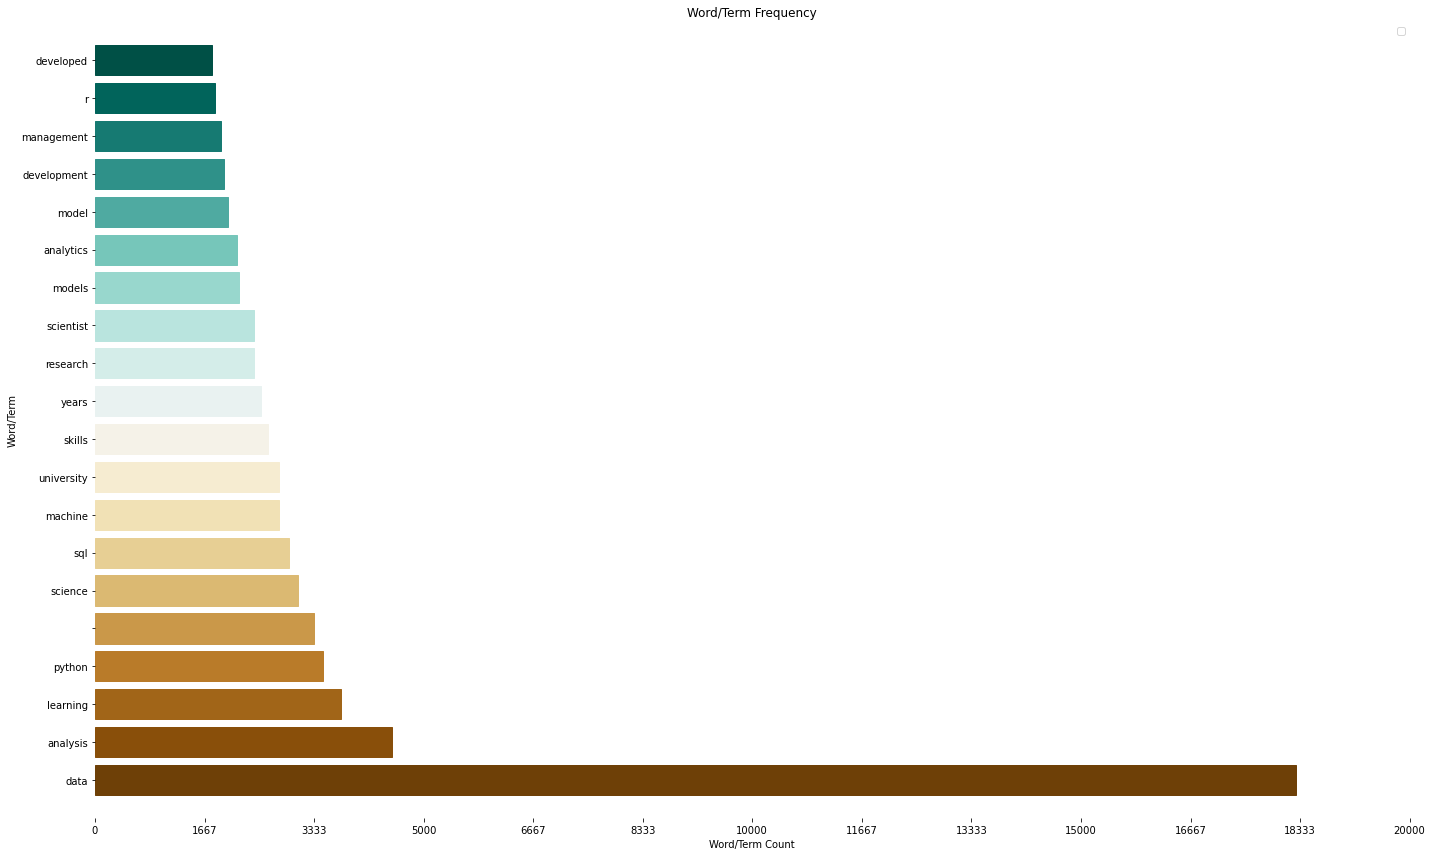

In [110]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)

colors = sns.color_palette("BrBG", len(labels))

y_pos = np.arange(len(labels))
ax.barh(y_pos, count, align='center', color=colors, edgecolor=colors)

plt.ylim(-1,20)

plt.legend(loc="best")
plt.title('Word/Term Frequency')
plt.xlabel('Word/Term Count')
plt.yticks(y_pos, labels)
plt.ylabel('Word/Term')
plt.xticks(np.linspace(0,20000, 13))


ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

plt.tight_layout()
_ = plt.show()

## Stemmed

In [111]:
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

In [112]:
Resumes_df['Header'] = Resumes_df['Header'].apply(lambda x: stemmer.stem(x))
#df['stem'] = df['resume_stopped'].str.split(' ')

In [113]:
# get wordcounts
wordcount = Counter(' '.join(Resumes_df['Header']).split(' '))

# limit wordcounts for visualization
wordcount = wordcount.most_common(20)
wordcount

[('data', 18145),
 ('analysis', 4285),
 ('learning', 3693),
 ('python', 3465),
 ('', 3350),
 ('science', 3057),
 ('sql', 2953),
 ('machine', 2776),
 ('university', 2775),
 ('research', 2441),
 ('scientist', 2359),
 ('years', 2327),
 ('model', 2136),
 ('models', 2117),
 ('development', 1901),
 ('analytics', 1835),
 ('r', 1828),
 ('developed', 1765),
 ('project', 1691),
 ('management', 1678)]

In [114]:
labels = [lbl for lbl, ct in wordcount]
count = [ct for lbl, ct in wordcount]

No handles with labels found to put in legend.


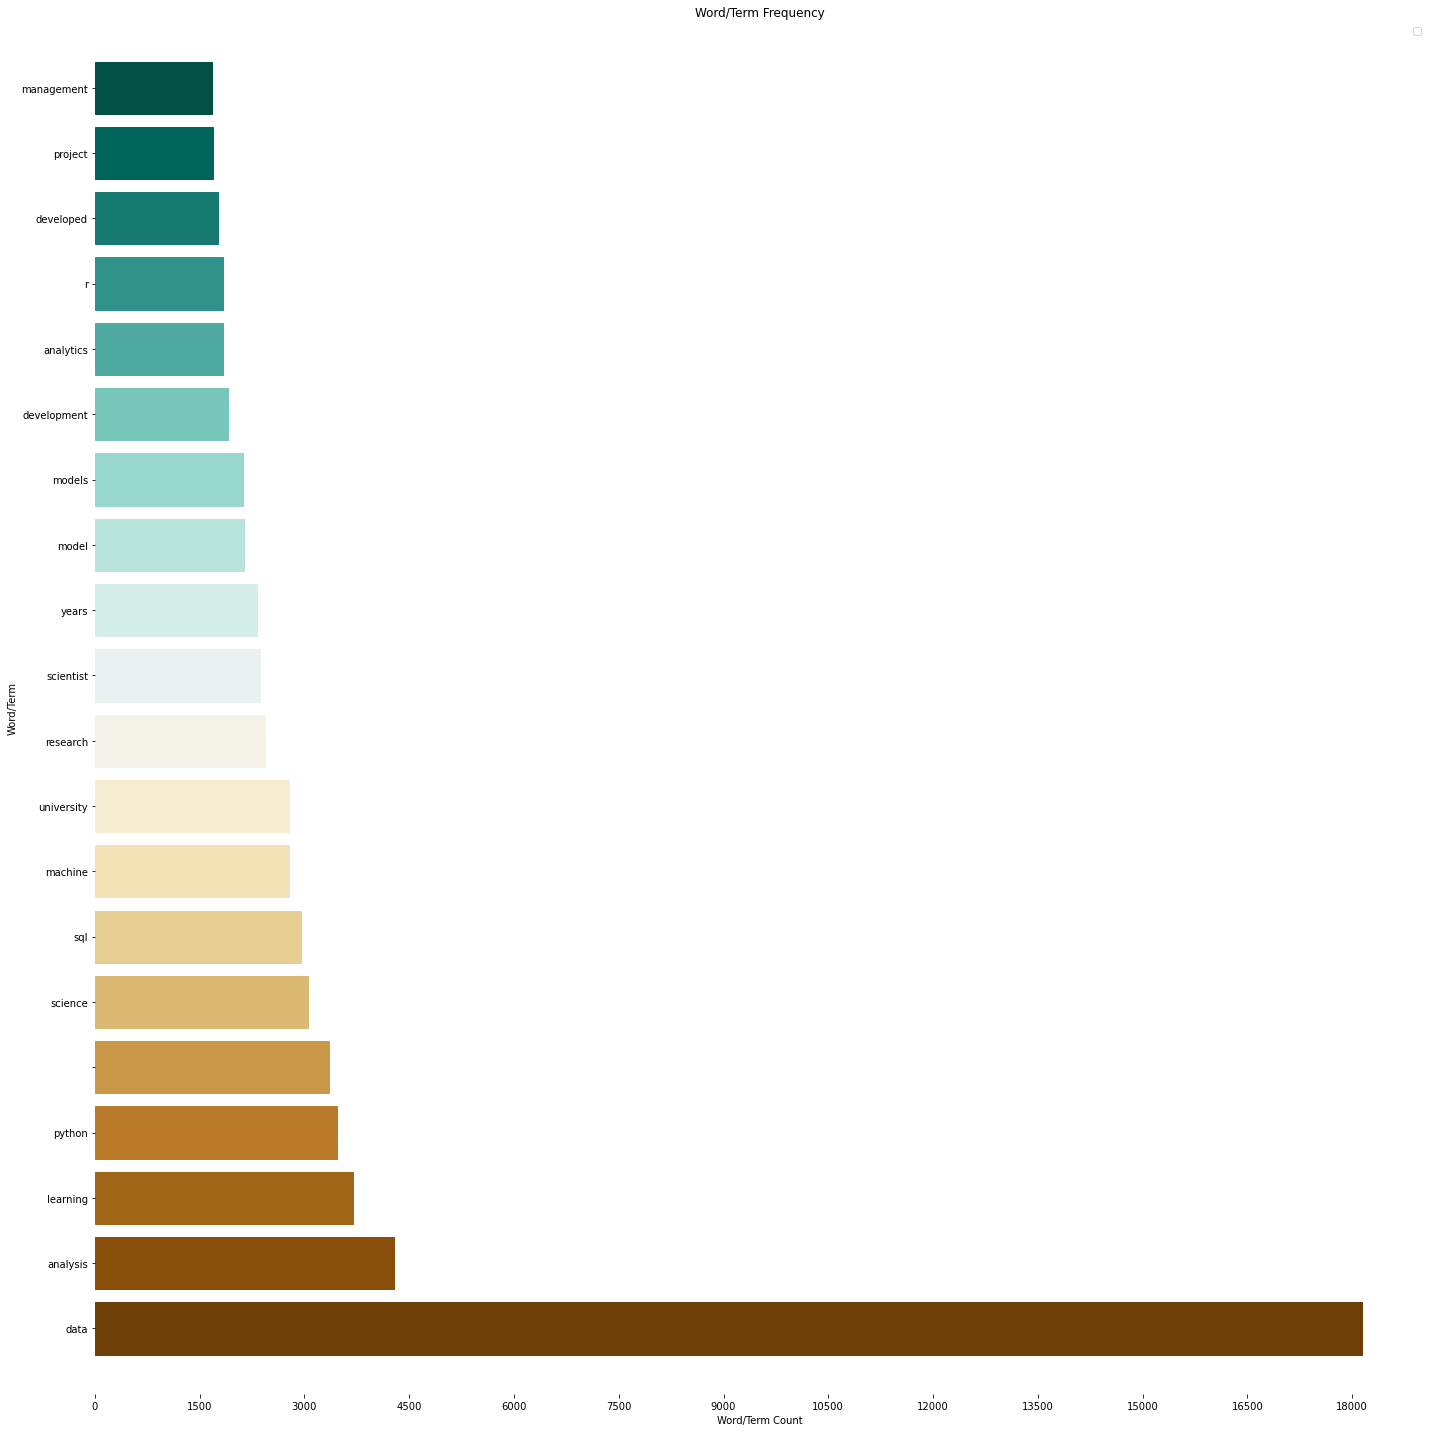

In [115]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

colors = sns.color_palette("BrBG", len(labels))

y_pos = np.arange(len(labels))
ax.barh(y_pos, count, align='center', color=colors, edgecolor=colors)

plt.ylim(-1,20)

plt.legend(loc="best")
plt.title('Word/Term Frequency')
plt.xlabel('Word/Term Count')
plt.yticks(y_pos, labels)
plt.ylabel('Word/Term')
plt.xticks(np.linspace(0,18000, 13))

ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

plt.tight_layout()
_ = plt.show()

In [116]:
fd = nltk.FreqDist(w.lower() for w in Resumes_df['Header'])
#fd.plot(10)
fd

FreqDist({'': 3332, 'skil': 1226, 'edut': 1199, 'pres': 1070, 'python': 692, 'sql': 671, 'data scientist': 620, 'link': 527, 'tableau': 489, 'r': 485, ...})

## Word Counts

In [117]:
text_amount = ' '.join(Resumes_df['Header'].tolist()).split()
len(text_amount)

529533

In [118]:
def get_wordcount(text_list, min_ct=3, most_common=30, get_all=False):
    '''
    returns => most common
    '''
    # get wordcount counter object
    word_count = Counter(text_list)

    # remove words that occur min_ct times or less
    word_count = Counter({k:v for k, v in word_count.items() if v >= min_ct})

    if get_all:
        # return all
        word_count = word_count.items()
    else:
        # limit wordcounts for visualization
        word_count = word_count.most_common(most_common)
    
    return word_count

## Count Vectorizer

In [119]:
n_samples = 2000
n_features = 1000
n_topics = 10
n_top_words = 20

In [120]:
# convert resume texts to a sparse matrix of token counts
ct_vect = CountVectorizer(ngram_range=(1, 3), max_df=0.90, min_df=2, max_features=n_features, stop_words='english')
ct_vect_prep = ct_vect.fit_transform(Resumes_df['Header'])

## TF-IDF

In [121]:
TfidfVectorizer(input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, analyzer='word', stop_words=None, token_pattern='(?u)\b\w\w+\b', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)

TfidfVectorizer(token_pattern='(?u)\x08\\w\\w+\x08')

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer

t_start = time()

tfidf_vec = TfidfVectorizer(input='content', ngram_range=(1, 3), max_df=0.9, min_df=2, 
                max_features=n_features, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)

tfidf_vec_prep = tfidf_vec.fit_transform(Resumes_df['Header'])

In [123]:
lda_mdl = LatentDirichletAllocation(max_iter=5, random_state=0)

In [ ]:
lda_mdl.fit(tfidf_vec_prep)

In [ ]:
# get feature names (topics) from model
feat_names = tfidf_vec.get_feature_names()

print('Start of list: ' + ', '.join(feat_names[50:60]))
print('End of list: ' + ', '.join(feat_names[-10:]))

# Top Words

In [ ]:
def print_top_words(model, feature_names, top_words):
    for i, topic in enumerate(model.components_):
        print("Topic {0}:".format(i))
        for wd in topic.argsort()[:-top_words - 1:-1]:
            print('\t{0}'.format(feature_names[wd]))
    print()

In [ ]:

print_top_words(lda_mdl, feat_names, 3)

## Noun Phrases

In [ ]:
nouns = lambda x: TextBlob(x).noun_phrases

Resumes_df['Header'] = Resumes_df['Header']
Resumes_df['Header'] = Resumes_df['Header'].apply(nouns)

In [ ]:
lst_to_str = lambda x: ' '.join(x)

Resumes_df['Header']= Resumes_df['Header'].apply(lst_to_str)

In [ ]:
Resumes_df.to_pickle('df_stop_noun.pkl')
Resumes_df = None

In [ ]:
Resume_df = pd.read_pickle('df_stop_noun.pkl')


## Vectorize

### Tokenization and stop word removal

In [ ]:
# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [[word for word in resume.split()] for resume in resumes]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# remove words that occur less than n times
texts = [[token for token in text if frequency[token] > 2] for text in texts]

In [ ]:
dictionary = corpora.Dictionary(texts)

dictionary.save('resume_token.dict')
print(dictionary)

## Token Resumes to Vectors

In [ ]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('resume_token.mm', corpus)  
# store to disk, for later use
for c in corpus[:1]:
    print(c)

## TF-IDF Transformation

In [ ]:
tfidf_mdl = models.TfidfModel(corpus) 

In [ ]:
# transform vectors
corpus_tfidf = tfidf_mdl[corpus]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
n_features = 1000

tfidf_vec = TfidfVectorizer(input='content', ngram_range=(1, 3), max_df=0.9, min_df=2, 
                max_features=n_features, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)

tfidf_vec_prep = tfidf_vec.fit_transform(resumes)

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

km = KMeans(n_clusters=8, init='k-means++', max_iter=100, n_init=1)

km_mdl = km.fit_predict(tfidf_vec_prep)


## Cosine Similarity

In [ ]:
Resume_df= pd.read_pickle('df_stop_noun.pkl')

In [ ]:
Resume_df['Header'].dropna(inplace=True)

In [ ]:
resumes = Resume_df['Header'].tolist()
while '' in resumes:
    resumes.remove('')


In [ ]:
index = similarities.MatrixSimilarity(corpus_tfidf)

In [ ]:
index.save('resume_stopped.index')
index = similarities.MatrixSimilarity.load('resume_stopped.index')

In [ ]:
sims = index[corpus] # perform a similarity query against the corpus

# (document_number, document_similarity)
sim_lst = list(enumerate(sims))

In [ ]:
sim_lst.sort(key=operator.itemgetter(1)).all()

In [ ]:
# comparing resumes within resumes
sim_lst[1:10]

In [ ]:
' '.join(texts[0])

## Future Improvements

Programs that make this process very user friendly and effective already exist such as jobscan.co. Regardless I would still like to try my hand at making a program where a user can upload their resume and have it suggest changes based on an interested job listing.
